# Reliance Stock Data in Different kinds of Charts

```


```

![_](https://indiaforensic.com/wp-content/uploads/2012/12/Stock-market12.jpg)


```


```

#### Types of Charts included for analysis are:
* Bar Chart
* Candlestick Chart 
* Line Chart

#### Different Timeframes used for analysis are:-
* Monthly
* Weekly
* Daily
* Hourly 
* 15 min

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import mplfinance as mpf
import pandas_ta as ta
from mpl_finance import candlestick_ohlc

C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [27]:
missing_value = ['N/a','na',np.nan,' ','-','0'] 
df=pd.read_csv('E:\Downloads\Projects\Stock Market/RELIANCE__EQ__NSE__NSE__MINUTE.csv',na_values = missing_value)

In [3]:
df.describe()

,open,high,low,close,volume
count,370405.000000,370405.000000,370405.000000,370405.000000,3.704040e+05
mean,1206.673075,1207.270095,1206.041315,1206.667301,2.905762e+04
std,430.730092,430.986306,430.458695,430.728493,5.023713e+04
min,502.500000,502.850000,501.850000,502.400000,5.200000e+01
25%,910.550000,910.900000,910.200000,910.550000,7.953750e+03
50%,1169.400000,1170.350000,1168.700000,1169.400000,1.532000e+04
75%,1425.000000,1425.700000,1424.100000,1425.000000,3.138400e+04
max,2368.000000,2369.000000,2361.150000,2367.300000,3.092709e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370546 entries, 0 to 370545
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  370546 non-null  object 
 1   open       370405 non-null  float64
 2   high       370405 non-null  float64
 3   low        370405 non-null  float64
 4   close      370405 non-null  float64
 5   volume     370404 non-null  float64
dtypes: float64(5), object(1)
memory usage: 17.0+ MB


In [5]:
df.isnull().sum()

timestamp      0
open         141
high         141
low          141
close        141
volume       142
dtype: int64

In [6]:
df.interpolate(inplace = True)

In [7]:
#sns.heatmap(df.isnull(), yticklabels = False, annot = True)
df.isnull().sum()

timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

In [8]:
df.head()

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,536.55,537.85,535.60,535.90,30989.0
1,2017-01-02 09:16:00+05:30,536.35,536.65,536.05,536.40,15076.0
2,2017-01-02 09:17:00+05:30,536.55,536.55,532.20,532.20,53438.0
3,2017-01-02 09:18:00+05:30,532.30,534.85,531.15,534.85,35025.0
4,2017-01-02 09:19:00+05:30,534.90,535.10,534.35,534.80,21102.0


In [9]:
print(type(df['timestamp']))

<class 'pandas.core.series.Series'>


In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [11]:
df['Time'] = pd.to_datetime(df['timestamp']).dt.time
df['Date'] = pd.to_datetime(df['timestamp']).dt.date
df['Month'] = pd.to_datetime(df['timestamp']).dt.month
df['Year'] = pd.to_datetime(df['timestamp']).dt.year

In [12]:
df.head()

,timestamp,open,high,low,close,volume,Time,Date,Month,Year
0,2017-01-02 09:15:00+05:30,536.55,537.85,535.60,535.90,30989.0,09:15:00,2017-01-02,1,2017
1,2017-01-02 09:16:00+05:30,536.35,536.65,536.05,536.40,15076.0,09:16:00,2017-01-02,1,2017
2,2017-01-02 09:17:00+05:30,536.55,536.55,532.20,532.20,53438.0,09:17:00,2017-01-02,1,2017
3,2017-01-02 09:18:00+05:30,532.30,534.85,531.15,534.85,35025.0,09:18:00,2017-01-02,1,2017
4,2017-01-02 09:19:00+05:30,534.90,535.10,534.35,534.80,21102.0,09:19:00,2017-01-02,1,2017


In [13]:
type(df['Time'])

pandas.core.series.Series

In [14]:
df['timestamp'].max()

Timestamp('2021-01-01 15:29:00+0530', tz='pytz.FixedOffset(330)')

In [15]:
#timedelta
df['timestamp'].max() - df['timestamp'].min()

Timedelta('1460 days 06:14:00')

In [16]:
# seting timestamp as index 
df.set_index('timestamp',inplace = True)

In [17]:
df

,open,high,low,close,volume,Time,Date,Month,Year
timestamp,,,,,,,,,
2017-01-02 09:15:00+05:30,536.55,537.85,535.60,535.90,30989.0,09:15:00,2017-01-02,1,2017
2017-01-02 09:16:00+05:30,536.35,536.65,536.05,536.40,15076.0,09:16:00,2017-01-02,1,2017
2017-01-02 09:17:00+05:30,536.55,536.55,532.20,532.20,53438.0,09:17:00,2017-01-02,1,2017
2017-01-02 09:18:00+05:30,532.30,534.85,531.15,534.85,35025.0,09:18:00,2017-01-02,1,2017
2017-01-02 09:19:00+05:30,534.90,535.10,534.35,534.80,21102.0,09:19:00,2017-01-02,1,2017
...,...,...,...,...,...,...,...,...,...
2021-01-01 15:25:00+05:30,1988.40,1988.40,1987.15,1988.25,17059.0,15:25:00,2021-01-01,1,2021
2021-01-01 15:26:00+05:30,1988.25,1989.50,1987.50,1987.95,26393.0,15:26:00,2021-01-01,1,2021
2021-01-01 15:27:00+05:30,1987.95,1989.75,1987.95,1989.70,24090.0,15:27:00,2021-01-01,1,2021


In [18]:
# this is happening because we have made date which is timestamp as index therefore we can easily index our data
df['2017-01-03']

<ipython-input-18-52d2a5b64436>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017-01-03']


,open,high,low,close,volume,Time,Date,Month,Year
timestamp,,,,,,,,,
2017-01-03 09:15:00+05:30,539.80,539.80,536.80,537.45,13636.0,09:15:00,2017-01-03,1,2017
2017-01-03 09:16:00+05:30,537.25,537.40,536.90,536.90,7020.0,09:16:00,2017-01-03,1,2017
2017-01-03 09:17:00+05:30,536.70,537.40,536.35,537.40,9673.0,09:17:00,2017-01-03,1,2017
2017-01-03 09:18:00+05:30,537.40,538.10,537.05,537.20,22588.0,09:18:00,2017-01-03,1,2017
2017-01-03 09:19:00+05:30,537.20,537.65,537.00,537.45,8256.0,09:19:00,2017-01-03,1,2017
...,...,...,...,...,...,...,...,...,...
2017-01-03 15:25:00+05:30,538.10,538.10,537.95,537.95,29770.0,15:25:00,2017-01-03,1,2017
2017-01-03 15:26:00+05:30,537.95,537.95,537.70,537.70,20858.0,15:26:00,2017-01-03,1,2017
2017-01-03 15:27:00+05:30,537.70,538.25,537.55,538.20,23860.0,15:27:00,2017-01-03,1,2017


In [19]:
# (slicing) data of 1 month from 2020 january to feburary
df['2020-01-01':'2020-01-01']['close']

timestamp
2020-01-01 09:15:00+05:30    1510.00
2020-01-01 09:16:00+05:30    1508.55
2020-01-01 09:17:00+05:30    1508.20
2020-01-01 09:18:00+05:30    1508.40
2020-01-01 09:19:00+05:30    1508.05
                              ...   
2020-01-01 15:25:00+05:30    1497.35
2020-01-01 15:26:00+05:30    1497.30
2020-01-01 15:27:00+05:30    1496.75
2020-01-01 15:28:00+05:30    1495.95
2020-01-01 15:29:00+05:30    1497.60
Name: close, Length: 375, dtype: float64

In [20]:
#format of date time should be March 5, 2014, 20:15:00
#January 1, 2020, 09:15:00
#January 7, 2020, 15:29:00        
from datetime import datetime
print("Enter the starting date in the format jan 1, 2020, 09:15:00")
a = input()
b = datetime.strptime(a,'%B %d, %Y, %H:%M:%S')
print(b)
print("Enter the Ending date in the format jan 1, 2020, 09:15:00")
c = input()
d = datetime.strptime(c,'%B %d, %Y, %H:%M:%S')
print(d)

Enter the starting date in the format jan 1, 2020, 09:15:00
January 1, 2020, 09:15:00
2020-01-01 09:15:00
Enter the Ending date in the format jan 1, 2020, 09:15:00
February 15, 2020, 15:29:00
2020-02-15 15:29:00


In [21]:
df2 = df[b:d]
df2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:5277: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


,open,high,low,close,volume,Time,Date,Month,Year
timestamp,,,,,,,,,
2020-01-01 09:15:00+05:30,1503.75,1510.20,1503.75,1510.00,89374.0,09:15:00,2020-01-01,1,2020
2020-01-01 09:16:00+05:30,1509.95,1510.55,1506.25,1508.55,71497.0,09:16:00,2020-01-01,1,2020
2020-01-01 09:17:00+05:30,1508.15,1509.30,1507.45,1508.20,40481.0,09:17:00,2020-01-01,1,2020
2020-01-01 09:18:00+05:30,1508.30,1508.50,1507.20,1508.40,29219.0,09:18:00,2020-01-01,1,2020
2020-01-01 09:19:00+05:30,1508.20,1509.35,1508.05,1508.05,36920.0,09:19:00,2020-01-01,1,2020
...,...,...,...,...,...,...,...,...,...
2020-02-14 15:25:00+05:30,1472.05,1472.10,1471.15,1471.30,12493.0,15:25:00,2020-02-14,2,2020
2020-02-14 15:26:00+05:30,1471.30,1471.70,1471.05,1471.35,20146.0,15:26:00,2020-02-14,2,2020
2020-02-14 15:27:00+05:30,1471.35,1471.35,1470.65,1471.05,25720.0,15:27:00,2020-02-14,2,2020


In [22]:
@interact 
def timeframe( Timeframe = ['15 min','Hourly','Daily','Weekly','Monthly']):
    if(Timeframe == 'Daily'):
        df3 = df2.resample("D").agg({"open":"first","close":"last","high":"max","low":"min","volume":"sum"})
        @interact
        def Chart_type( Chart = ['Bars','Candle','line']):
            if(Chart == 'Bars'):
                df3.dropna(inplace = True)
                df3['RSI'] = df3.ta.rsi(length = 10)
                mpf.plot(df3,volume = True,mav = (10,20,50,200),title = "Reliance",style = "yahoo")
                
            elif(Chart == 'Candle'):
                df3.dropna(inplace = True)
                mpf.plot(df3,type = "candle",volume = True,mav = (10,20,50,200),title = "Reliance",style = "yahoo")
            elif(Chart == 'line'):
                df3.dropna(inplace = True)
                mpf.plot(df3,type = "line",volume = True,mav = (10,20,50,200),title = "Reliance",style = "yahoo")
        
    elif(Timeframe == 'Weekly'):
        df3 = df2.resample("W").agg({"open":"first","close":"last","high":"max","low":"min","volume":"sum"})
        @interact
        def Chart_type( Chart = ['Bars','Candle','line']):
            if(Chart == 'Bars'):
                df3.dropna(inplace = True)
                mpf.plot(df3,volume = True,mav = (10,20,50,200),title = "Reliance",style = "yahoo")
            elif(Chart == 'Candle'):
                df3.dropna(inplace = True)
                mpf.plot(df3,type = "candle",volume = True,mav = (10,20,50,200),title = "Reliance",style = "yahoo")
                
            elif(Chart == 'line'):
                df3.dropna(inplace = True)
                mpf.plot(df3,type = "line",volume = True,mav = (10,20,50,200),title = "Reliance",style = "yahoo")
        
    elif(Timeframe == 'Monthly'):
        df3 = df2.resample("M").agg({"open":"first","close":"last","high":"max","low":"min","volume":"sum"})
        @interact
        def Chart_type( Chart = ['Bars','Candle','line']):
            if(Chart == 'Bars'):
                df3.dropna(inplace = True)
                mpf.plot(df3,volume = True,mav = (10,20,50,200),title = "Reliance",style = "yahoo")
            elif(Chart == 'Candle'):
                df3.dropna(inplace = True)
                mpf.plot(df3,type = "candle",volume = True,mav = (10,20,50,200),title = "Reliance",style = "yahoo")
            elif(Chart == 'line'):
                df3.dropna(inplace = True)
                mpf.plot(df3,type = "line",volume = True,mav = (10,20,50,200),title = "Reliance",style = "yahoo")
    
    elif(Timeframe == 'Hourly'):
        df3 = df2.resample("H").agg({"open":"first","close":"last","high":"max","low":"min","volume":"sum"})
        @interact
        def Chart_type( Chart = ['Bars','Candle','line']):
            if(Chart == 'Bars'):
                df3.dropna(inplace = True)
                mpf.plot(df3,volume = True,mav = (10,20,50,200),title = "Reliance",style = "yahoo")
            elif(Chart == 'Candle'):
                df3.dropna(inplace = True)
                mpf.plot(df3,type = "candle",volume = True,mav = (10,20,50,200),title = "Reliance",style = "yahoo")
            elif(Chart == 'line'):
                df3.dropna(inplace = True)
                mpf.plot(df3,type = "line",volume = True,mav = (10,20,50,200),title = "Reliance",style = "yahoo")
                    
    elif(Timeframe == '15 min'):
        df3 = df2.resample("15 min").agg({"open":"first","close":"last","high":"max","low":"min","volume":"sum"})
        @interact
        def Chart_type( Chart = ['Bars','Candle','line']):
            if(Chart == 'Bars'):
                df3.dropna(inplace = True)
                mpf.plot(df3,volume = True,mav = (10,20,50,200),title = "Reliance",style = "yahoo")
            elif(Chart == 'Candle'):
                df3.dropna(inplace = True)
                mpf.plot(df3,type = "candle",volume = True,mav = (10,20,50,200),title = "Reliance",style = "yahoo")
            elif(Chart == 'line'):
                df3.dropna(inplace = True)
                mpf.plot(df3,type = "line",volume = True,mav = (10,20,50,200),title = "Reliance",style = "yahoo")
                    

interactive(children=(Dropdown(description='Timeframe', options=('15 min', 'Hourly', 'Daily', 'Weekly', 'Month…

In [23]:
df3 = df2.resample("D").agg({"open":"first","close":"last","high":"max","low":"min","volume":"sum"})
df3
df3.dropna(inplace = True)

In [24]:
df3['RSI'] = df3.ta.rsi(length = 10)
df3.tail()

,open,close,high,low,volume,RSI
timestamp,,,,,,
2020-02-10 00:00:00+05:30,1414.60,1429.45,1431.95,1397.25,6979506.0,44.288562
2020-02-11 00:00:00+05:30,1433.80,1440.35,1452.35,1431.95,6431982.0,47.586830
2020-02-12 00:00:00+05:30,1442.50,1459.20,1460.55,1442.50,6237132.0,52.940274
2020-02-13 00:00:00+05:30,1463.85,1457.15,1463.85,1448.85,6229919.5,52.294840
2020-02-14 00:00:00+05:30,1463.40,1471.90,1487.20,1439.45,9775290.0,56.531608


In [25]:
df3.ta.sma(length = 5, append = True)

timestamp
2020-01-01 00:00:00+05:30        NaN
2020-01-02 00:00:00+05:30        NaN
2020-01-03 00:00:00+05:30        NaN
2020-01-06 00:00:00+05:30        NaN
2020-01-07 00:00:00+05:30    1507.46
2020-01-08 00:00:00+05:30    1507.90
2020-01-09 00:00:00+05:30    1510.93
2020-01-10 00:00:00+05:30    1513.07
2020-01-13 00:00:00+05:30    1520.99
2020-01-14 00:00:00+05:30    1521.42
2020-01-15 00:00:00+05:30    1523.42
2020-01-16 00:00:00+05:30    1521.36
2020-01-17 00:00:00+05:30    1528.13
2020-01-20 00:00:00+05:30    1526.61
2020-01-21 00:00:00+05:30    1527.78
2020-01-22 00:00:00+05:30    1529.99
2020-01-23 00:00:00+05:30    1528.01
2020-01-24 00:00:00+05:30    1516.73
2020-01-27 00:00:00+05:30    1511.94
2020-01-28 00:00:00+05:30    1499.75
2020-01-29 00:00:00+05:30    1489.01
2020-01-30 00:00:00+05:30    1472.13
2020-01-31 00:00:00+05:30    1449.53
2020-02-01 00:00:00+05:30    1422.78
2020-02-03 00:00:00+05:30    1405.45
2020-02-04 00:00:00+05:30    1394.84
2020-02-05 00:00:00+05:30   

No handles with labels found to put in legend.


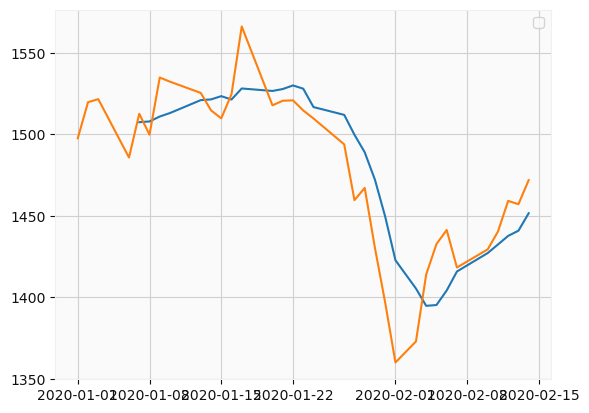

In [26]:
plt.plot(df3.index,df3.SMA_5)
plt.plot(df3.index,df3.close)
plt.legend()

```looking at the minutes volumes of the stock we can derive that Reliance is very heavily traded in the market and can be a good select for intraday trading. We can also say through the chart that the stock moves parallely with NIFTY throughout the day and may have beta value near to 1 which indicates volatility.```